In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline
import cv2

In [75]:
img= cv2.imread('./test_images/viru_1.jpg')

In [76]:
img.shape

(988, 678, 3)

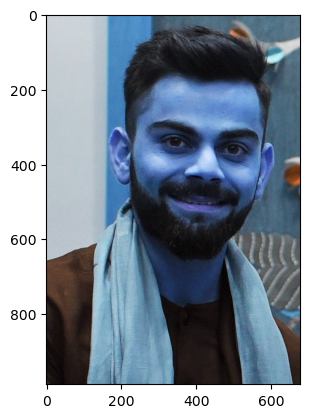

In [77]:
plt.imshow(img)

In [78]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(988, 678)

In [79]:
gray

array([[210, 211, 213, ..., 123, 125, 124],
       [209, 210, 211, ..., 121, 121, 119],
       [209, 209, 209, ..., 121, 120, 118],
       ...,
       [ 47,  46,  45, ...,  37,  39,  38],
       [ 47,  46,  45, ...,  39,  39,  36],
       [ 47,  46,  45, ...,  40,  37,  33]], dtype=uint8)

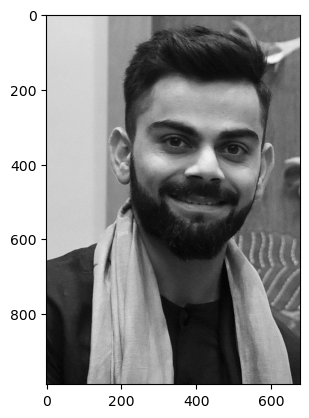

In [80]:
plt.imshow(gray, cmap='gray')

In [81]:
face_cascade= cv2.CascadeClassifier(".\opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade= cv2.CascadeClassifier(".\opencv\haarcascades\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[203, 182, 428, 428]])

In [82]:
(x,y,w,h)=faces[0]
x,y,w,h

(203, 182, 428, 428)

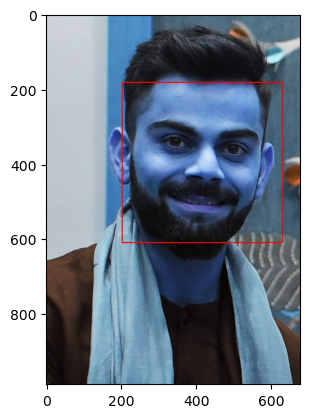

In [83]:
face_img= cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

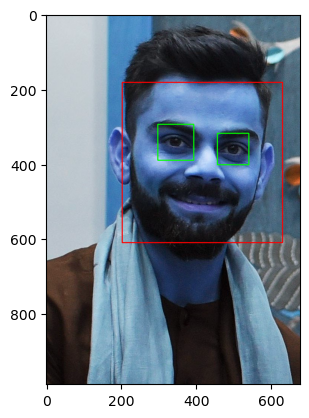

In [84]:
for (x,y,w,h) in faces:
    face_img= cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray= gray[y:y+h, x:x+w]
    roi_color= face_img[y:y+h, x:x+w]
    eyes= eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

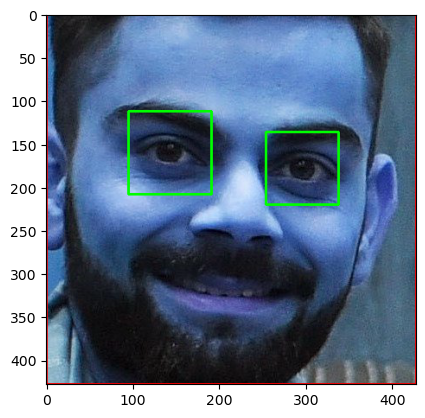

In [85]:
plt.imshow(roi_color, cmap='gray')

(428, 428, 3)
hello


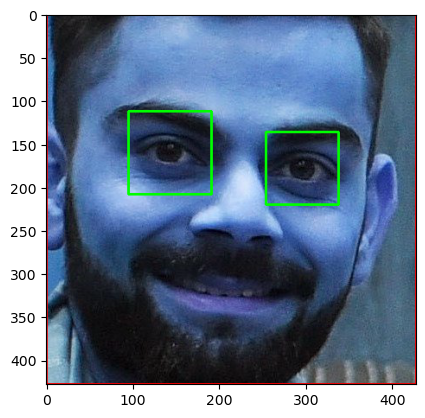

In [87]:
cropped_img2= np.array(roi_color)
print(cropped_img2.shape)
plt.imshow(cropped_img2)
print("hello")

In [88]:
# Wavelet transform

In [89]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

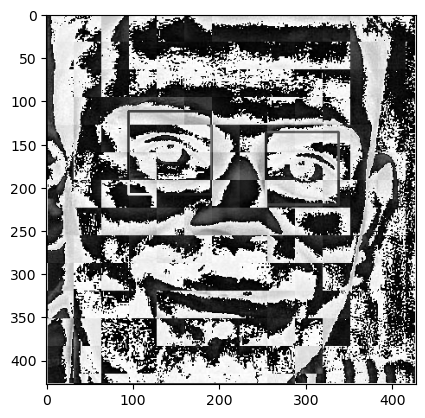

In [90]:
im_har = w2d(cropped_img2,'db1',5)
plt.imshow(im_har, cmap='gray')

In [91]:
def get_cropped_image_if_2_eyes(image_path):
    img= cv2.imread(image_path)
    gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces= face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color= img[y:y+h, x:x+w]
        eyes= eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

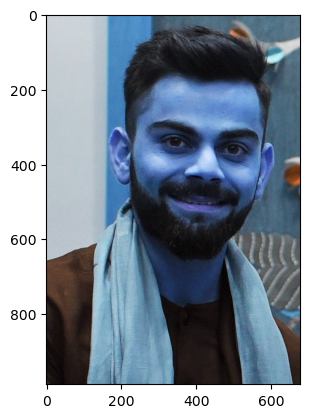

In [92]:
original_image= cv2.imread('./test_images/viru_1.jpg')
plt.imshow(original_image)

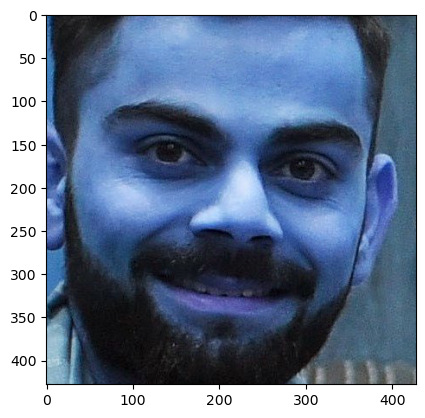

In [93]:
cropped_image= get_cropped_image_if_2_eyes('./test_images/viru_1.jpg')
plt.imshow(cropped_image)

In [94]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


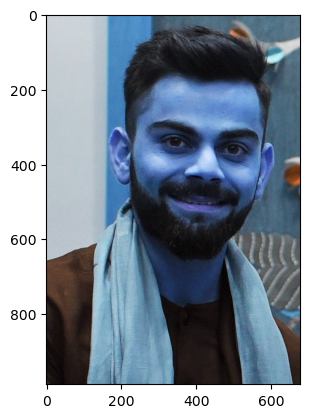

In [95]:
original_image = cv2.imread('./test_images/viru_1.jpg')
plt.imshow(original_image)

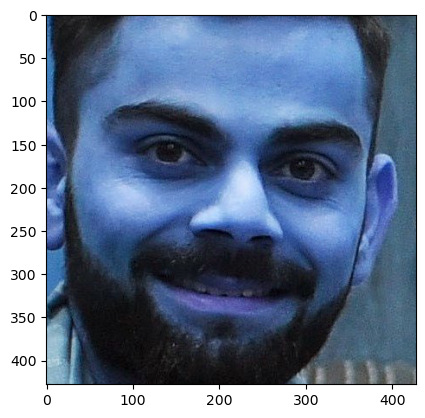

In [96]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/viru_1.jpg')
plt.imshow(cropped_image)

In [97]:
path_to_data= "./dataset/"
path_to_cr_data= "./dataset/cropped/"


In [98]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [99]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [100]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [101]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name= img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name]=[]    
    for entry in os.scandir(img_dir):
        roi_color=  get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
            cropped_file_name= celebrity_name + str(count)+ ".png"
            cropped_file_path= cropped_folder + "/" +cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

In [106]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name= img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]= file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\

In [107]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]= count
    count= count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [108]:
'''We will use both cropped images and wavelet transformed images to train
our classifier'''

'We will use both cropped images and wavelet transformed images to train\nour classifier'

In [109]:
X, y=[],[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scaled_raw_img= cv2.resize(img, (32,32))
        img_har= w2d(img, 'db1', 5)
        scaled_img_har= cv2.resize(img_har, (32,32))
        combined_img= np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [110]:
len(X[0])

4096

32*32*3+ 32*32

In [111]:
X[0]

array([[ 96],
       [129],
       [141],
       ...,
       [237],
       [234],
       [233]], dtype=uint8)

In [112]:
y[0]

0

In [113]:
X= np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(169, 4096)

In [114]:
# Training the model
# Will find the best model among SVM, logistic regression and Random forest using gridsearch cv
# and then train our model using the algorithm which gives best accuracy

In [115]:
# training the model

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [117]:
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
classifier= SVC(kernel='rbf', C=10)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8372093023255814


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.95        10
           2       0.50      0.83      0.62         6
           3       1.00      0.75      0.86         8
           4       0.92      0.92      0.92        12

    accuracy                           0.84        43
   macro avg       0.87      0.81      0.82        43
weighted avg       0.89      0.84      0.84        43



In [119]:
# using gridsearchcv

In [120]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [121]:
# def Algo_search(models , params):

#     max_score = 0
#     max_model = None
#     max_model_params = None

#     for i,j in zip(models.keys() , models.values() ):

#             gs = GridSearchCV(estimator=j,param_grid=params[i])
#             a = gs.fit(X_train,y_train)
#             score = gs.score(X_test,y_test)

#             if score > max_score:
#                 max_score = score
#                 max_model = gs.best_estimator_
#                 max_model_params = gs.best_params_

#     return max_score, max_model, max_model_params
# models= {'svm': SVC(gamma='auto', probability='True'), 'rf' : RandomForestClassifier(), 'log_reg': LogisticRegression(solver='liblinear', multi_class='auto')}

# params_svm={'C':[0.1,1,2,5,10,50], 'kernel':['rbf','linear']}
# params_rf={'n_estimators':[10,100,200]}
# params_log_reg={'C':[1,5,10]}

# params={'svm':params_svm, 'rf': params_rf, 'log_reg': params_log_reg}

# grid_ml=algo_search(models= models, params = params)

In [122]:
# def algo_search(models, params):
#     scores=[]
#     best_estimators={}
#     for i, j in zip(models.keys(), models.values()):
#         gs= GridSearchCV(estimator=j, param_grid = params[i])
#         a= gs.fit(X_train, y_train)
#         score= gs.score(X_test, y_test)
#         scores.append({
#         'model': i,
#         'best_score': a.best_score_,
#         'best_params': a.best_params_})
#         best_estimators[i] = a.best_estimator_
            
#     return scores, best_estimators
    
    
# models= {'svm': SVC(gamma='auto', probability='True'), 'rf' : RandomForestClassifier(), 'log_reg': LogisticRegression(solver='liblinear', multi_class='auto')}

# params_svm={'C':[0.1,1,2,5,10,50], 'kernel':['rbf','linear']}
# params_rf={'n_estimators':[10,100,200]}
# params_log_reg={'C':[1,5,10]}

# params={'svm':params_svm, 'rf': params_rf, 'log_reg': params_log_reg}

# grid_ml=algo_search(models= models, params = params)

In [123]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [124]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.817846,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.572308,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.824923,{'logisticregression__C': 1}


In [125]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [126]:
best_estimators['svm'].score(X_test, y_test)

0.8372093023255814

In [127]:
best_estimators['random_forest'].score(X_test, y_test)

0.627906976744186

In [128]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.9534883720930233

In [129]:
best_clf=best_estimators['svm']

In [130]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  0,  2,  0,  1],
       [ 0, 10,  0,  0,  0],
       [ 0,  1,  5,  0,  0],
       [ 0,  0,  2,  6,  0],
       [ 0,  0,  1,  0, 11]], dtype=int64)

In [131]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot='True')
plt.xlabel('Predicted')
plt.ylabel('Truth')

C:\Users\dream\anaconda3.2\Lib\site-packages\seaborn\matrix.py:71: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros(data.shape, np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 1000x700 with 0 Axes>

In [132]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [133]:
# Saving the trained model

In [134]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [135]:
# save class dictionary

In [136]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))